In [1]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [2]:
import IPython.display as display

import tensorflow_hub as hub

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import time
import functools

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [4]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [5]:
content_image = load_image('D:\\aiffel\\QUEST\\aiffelthon\\multimodel_sample\\sample_data\\sample_data_image\\110100120220620112135.jpg')
style_image = load_image('D:\\aiffel\\QUEST\\aiffelthon\\multimodel_sample\\sample_data\\sample_data_image\\110101020220620163918.jpg')

In [6]:
content_image.shape

TensorShape([1, 480, 640, 3])

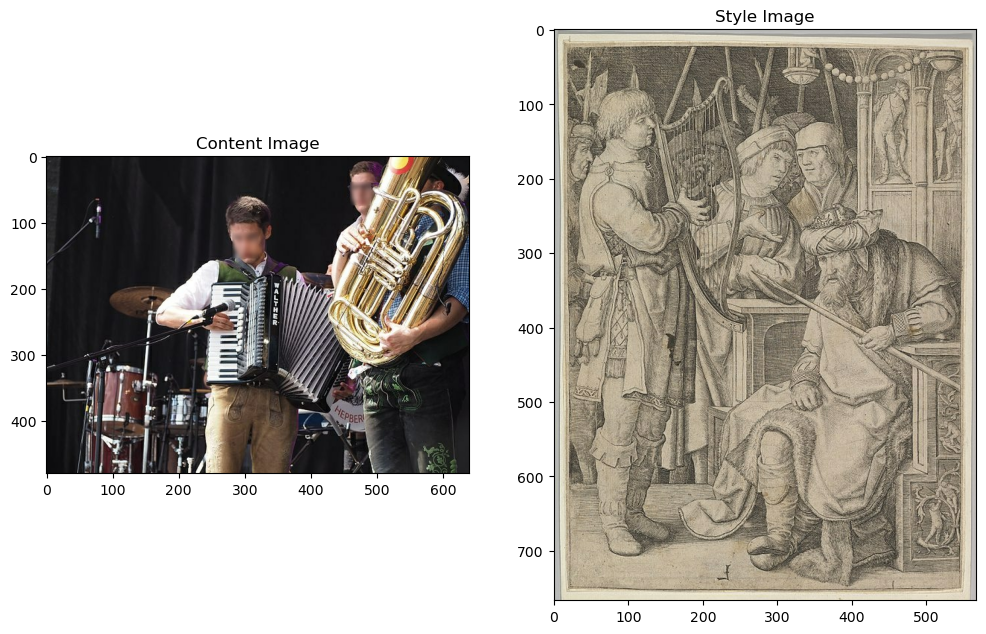

In [7]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [8]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

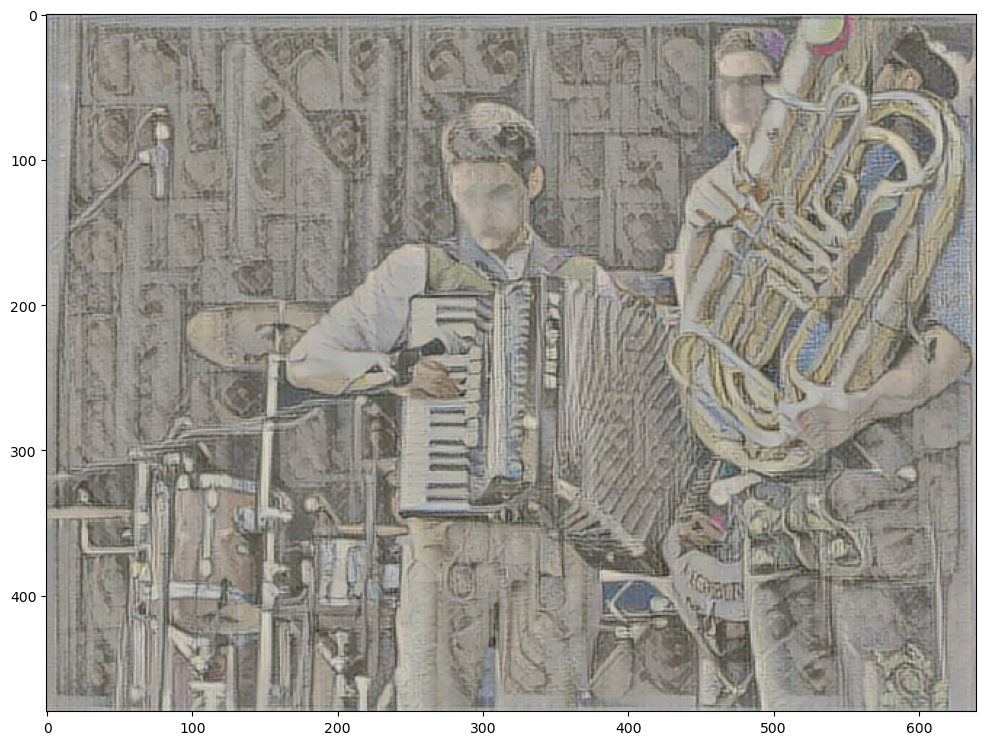

In [9]:
plt.imshow(np.squeeze(stylized_image))
plt.show()